In [199]:
import matplotlib.pyplot as plt
import pandas as pd

### With 100 points, three cases:

1. Ideal
2. Gaussian noise
3. Uniform noise

we have created a dataset with 100 points. The relation we want to investigate is

$$
2.5382 cos(x)+x^2-0.5
$$

In [200]:
import numpy as np

X = 5 * np.random.randn(100,1)
a = 2 #weight for noise
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(100,1)
u = y + a*np.random.rand(100,1)

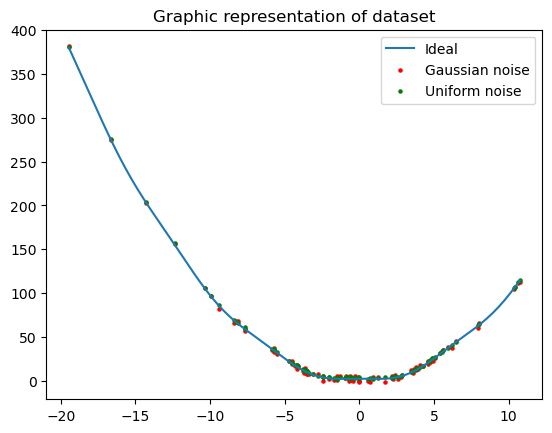

In [201]:
x = np.arange(np.min(X),np.max(X)+0.2, 0.2)
g = 2.5382 * np.cos(x) + x ** 2 - 0.5 
plt.plot(x,g, label='Ideal')
plt.scatter(X,n, label='Gaussian noise', s=5, color='r')
plt.scatter(X,u, label='Uniform noise', s=5, color='green')
plt.title('Graphic representation of dataset')
plt.legend()

from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    procs=8,
)

In [202]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "sin",
        "exp",
        "log",
    ],
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    warm_start=True,
    turbo=True,
    #batching=True, not so useful for this example
)

## 1. Ideal


In [203]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          31.194988   
	1        3.392578                                          (x0 * x0)   
	2        0.076947                          ((x0 * x0) + -0.71010303)   
	3        0.698964                              ((x0 * x0) + cos(x0))   
	4        0.905342                ((x0 * x0) + (cos(x0) * 2.6249137))   
	5        0.039603           ((x0 * x0) + (sin(cos(x0)) * 2.9657416))   
	6        4.152517  ((x0 * x0) + ((cos(x0) * 2.6248975) + -0.47910...   
	7  >>>>  0.219459  (((1.8004502 + exp(-0.27597865)) * cos(x0)) + ...   
	8        0.042292  (((1.8004502 + cos(cos(exp(-0.27597865)))) * c...   
	9        0.002586  ((((log(1.8004502) + cos(exp(cos(1.8004502))))...   
	
	          loss  complexity  
	0  3127.346700           1  
	1     3.535249           3  
	2     3.030994           5  
	3     1.506706           6  
	4     0.246410           8  
	5     0.236842           9  
	6     0.003724          10  
	7     0.001243          15  
	8     0.001142          17  
	9     0.001133          20  
]

In [204]:
p_1 = model.predict(X)
l_1 = model.latex()
p=[]
l=[]
p.append(p_1), l.append(l_1)

(None, None)

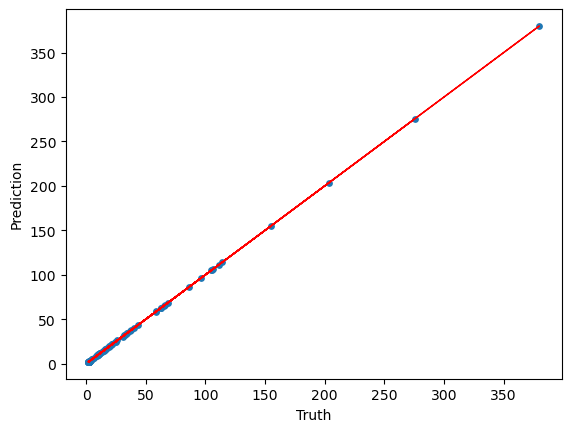

In [205]:
plt.scatter(y, p_1,s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

In [206]:
from IPython.display import Markdown as md
md(f"The model has this equation as output: ${l[0]}$")

The model has this equation as output: $x_{0}^{2} + 2.56 \cos{\left(x_{0} \right)} - 0.466$

## 2. Gaussian noise


In [207]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          31.301937   
	1        3.041000                                          (x0 * x0)   
	2        0.026623                          ((x0 * x0) + -0.60822093)   
	3  >>>>  0.244301                              ((x0 * x0) + cos(x0))   
	4        0.100780                ((x0 * x0) + (2.4235234 * cos(x0)))   
	5        0.007304            ((x0 * x0) + (sin(cos(x0)) * 2.749604))   
	6        0.031851  (((x0 * x0) + -0.42383182) + (cos(x0) * 2.2826...   
	7        0.005242  ((x0 * x0) + ((sin(cos(x0)) * 2.6661727) + -0....   
	8        0.004488  ((((x0 * x0) + log(cos(cos(x0 * x0)))) + cos(x...   
	9        0.002631  ((((x0 * x0) + (sin(log(cos(cos(x0 * x0)))) * ...   
	
	          loss  complexity  
	0  3124.451200           1  
	1     7.135012           3  
	2     6.765032           5  
	3     5.298726           6  
	4     4.331471           8  
	5     4.299947           9  
	6     4.165150          10  
	7     4.143374          11  
	8     4.051422          16  
	9     4.019566          19  
]

In [208]:
p_2 = model.predict(X)
l_2 = model.latex()
p.append(p_2), l.append(l_2)

(None, None)

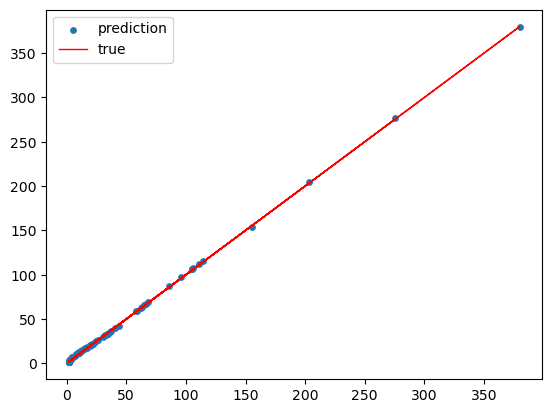

In [209]:
plt.scatter(y, p_2,s=15, label='prediction')
plt.plot(y,y, color='r', lw=1, label='true')
plt.legend()
plt.show()

In [210]:
md(f"The model has this equation as output: ${l[1]}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{0} \right)}$

## 3. Uniform noise

In [211]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           32.16957   
	1         3.398495                                          (x0 * x0)   
	2         0.010117                            ((x0 * x0) + 0.2639944)   
	3         0.759481                              ((x0 * x0) + cos(x0))   
	4         0.523480                ((x0 * x0) + (cos(x0) * 2.4724653))   
	5   >>>>  0.189134  (((x0 * x0) + (cos(x0) * 2.4460158)) + 0.26412...   
	6         0.051166  ((((x0 * x0) + (cos(x0) * 2.4460158)) + 0.2641...   
	7         0.017001  (((x0 * x0) + (cos(x0) * exp(cos(0.35970822)))...   
	8         0.002033  ((((x0 * x0) + (cos(x0) * exp(cos(0.35970822))...   
	9         0.000903  ((((x0 * x0) + (cos(x0) * exp(cos(0.35970822))...   
	10        0.000907  ((((x0 * x0) + (cos(x0) * 1.6156379)) + cos(x0...   
	11        0.000018  ((((x0 * x0) + (cos(x0) * 1.6156379)) + cos(x0...   
	12        0.005178  ((((x0 * x0) + ((cos(x0) * cos(0.018914035)) *...   
	
	           loss  complexity  
	0   3112.983000           1  
	1      3.477616           3  
	2      3.407956           5  
	3      1.594614           6  
	4      0.559715           8  
	5      0.383431          10  
	6      0.346134          12  
	7      0.340300          13  
	8      0.339609          14  
	9      0.339302          15  
	10     0.338687          17  
	11     0.338681          18  
	12     0.336932          19  
]

In [212]:
p_3 = model.predict(X)
l_3 = model.latex()
p.append(p_3), l.append(l_3)

(None, None)

In [213]:
md(f"The model has this equation as output: ${l[2]}$")

The model has this equation as output: $x_{0}^{2} + 2.45 \cos{\left(x_{0} \right)} + 0.264$

## Comparison beetween ideal and noised

Gaussian

I compute the diferences between ideal and noised data, and later I used the discovered formulas to do the same:

In [214]:
d_1 = y-n 
d_2 = p_1-p_2

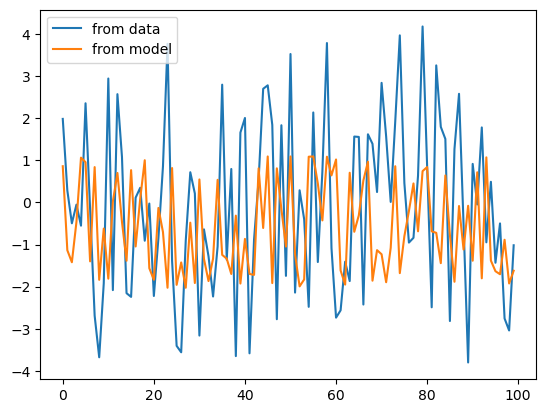

In [215]:
plt.plot(d_1, label='from data')
plt.plot(d_2, label='from model')
plt.legend()

seems that the model reduces the discrepances between ideal data and gaussian-noised data: I think that's fine because we find in both cases two formulas very similar. ($ x^2+a\cdot cos(x)+ b$, where  $a, b \in \mathbb{R}$)


Uniform

In [216]:
r_1 = y-u
r_2 = p_1-p_3

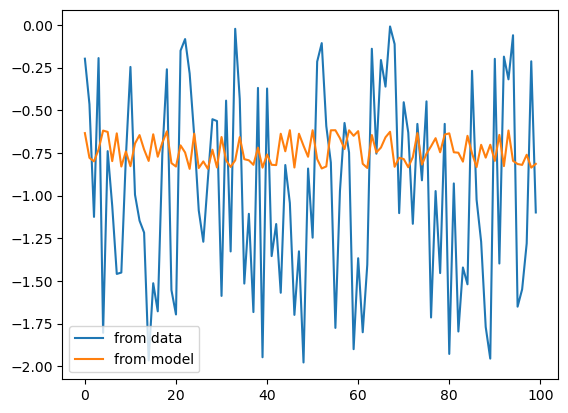

In [217]:
plt.plot(r_1, label='from data')
plt.plot(r_2, label='from model')
plt.legend()

## Tryhard #1: using only 50 points

In [218]:
X = 5 * np.random.randn(50,1)
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(50,1)
u = y + a*np.random.rand(50,1)

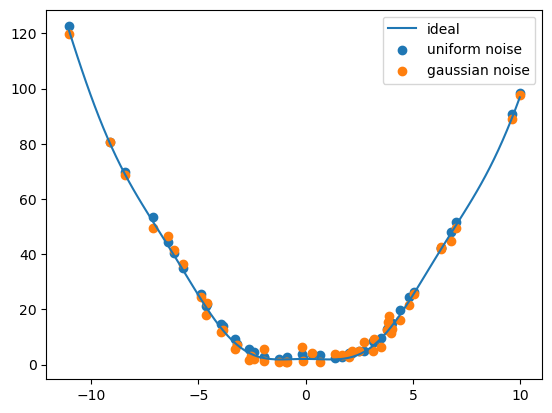

In [219]:
x = np.arange(np.min(X),np.max(X)+0.2, 0.2)
g = 2.5382 * np.cos(x) + x ** 2 - 0.5 
plt.plot(x,g, label='ideal')
plt.scatter(X,u, label='uniform noise')
plt.scatter(X,n, label='gaussian noise')
plt.legend()

Ideal

In [220]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          22.329193   
	1        2.618201                                          (x0 * x0)   
	2        0.098461                           ((x0 * x0) + -0.8543298)   
	3        0.654713                              ((x0 * x0) + cos(x0))   
	4        0.989168                 ((x0 * x0) + (cos(x0) * 2.667463))   
	5        2.321307  ((x0 * x0) + ((cos(x0) * 2.4724653) + -0.51766...   
	6  >>>>  3.958233  (((x0 * x0) + (((exp(-0.6964191) * 0.5297366) ...   
	
	           loss  complexity  
	0  7.676431e+02           1  
	1  4.083369e+00           3  
	2  3.353489e+00           5  
	3  1.742443e+00           6  
	4  2.409782e-01           8  
	5  2.321217e-03          10  
	6  5.895515e-12          15  
]

In [221]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)

(None, None)

In [222]:
md(f"The model has this equation as output: ${l[3]}$")

The model has this equation as output: $x_{0}^{2} + 2.54 \cos{\left(x_{0} \right)} - 0.500$

Gaussian

In [223]:
model.fit(X, n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          22.510208   
	1         2.269436                                          (x0 * x0)   
	2         0.028943                          ((x0 * x0) + -0.67587847)   
	3         0.300945                              ((x0 * x0) + cos(x0))   
	4   >>>>  0.176531                ((x0 * x0) + (cos(x0) * 2.7680006))   
	5         0.010341  (((x0 * x0) + -0.24226482) + (cos(x0) * 2.7680...   
	6         0.003566        ((x0 * x0) + (exp(cos(sin(x0))) * cos(x0)))   
	7         0.007678  ((x0 * x0) + ((cos(x0 + -0.12926777) * 2.47246...   
	8         0.070217  ((x0 * x0) + (cos(x0) * exp(cos(exp(-0.5176607...   
	9         0.022722  (((x0 * x0) + -0.43544114) + (cos(x0) * exp(co...   
	10        0.009349  (((x0 * x0) + -0.43544114) + (cos(x0) * exp(co...   
	11        0.013283  (((x0 * x0) + cos(x0)) + (cos(x0) * exp(cos((-...   
	12        0.017169  (((x0 * x0) + -0.1143615) + (cos(x0) * exp(cos...   
	13        0.014965  (((x0 * x0) + (cos(1.1346235) * -1.1704096)) +...   
	
	          loss  complexity  
	0   760.317500           1  
	1     8.124343           3  
	2     7.667406           5  
	3     5.674789           6  
	4     3.986730           8  
	5     3.905122          10  
	6     3.891219          11  
	7     3.861458          12  
	8     3.599618          13  
	9     3.439700          15  
	10    3.375983          17  
	11    3.331436          18  
	12    3.274726          19  
	13    3.226084          20  
]

In [224]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)

(None, None)

In [225]:
md(f"The model has this equation as output: ${l[4]}$")

The model has this equation as output: $x_{0}^{2} + 2.77 \cos{\left(x_{0} \right)}$

uniform

In [226]:
model.fit(X, u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                           23.35404   
	1        2.698898                                          (x0 * x0)   
	2        0.004277                             (x0 * (x0 * 1.004785))   
	3        0.827600                              ((x0 * x0) + cos(x0))   
	4        0.501208                ((x0 * x0) + (cos(x0) * 2.3317938))   
	5  >>>>  0.298073    ((x0 * x0) + (0.567188 + (cos(x0) * 2.464124)))   
	6        0.007946  ((x0 * x0) + (sin(0.567188) + (cos(x0) * 2.464...   
	7        0.002146  ((x0 * x0) + (sin(sin(0.567188)) + (cos(x0) * ...   
	
	         loss  complexity  
	0  771.358600           1  
	1    3.491589           3  
	2    3.461850           5  
	3    1.513165           6  
	4    0.555319           8  
	5    0.305943          10  
	6    0.303521          11  
	7    0.302871          12  
]

In [227]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)
md(f"The model has this equation as output: ${l[5]}$")

The model has this equation as output: $x_{0}^{2} + 2.46 \cos{\left(x_{0} \right)} + 0.567$

It seems that the gaussian noise has a greater disturbance on the data, in fact the expression that I found is slightly different from the ideal one. The model suffers a bit with gaussian noise, while the model is reliable with the uniform noise

## Tryhard: 5(or 2) variables



In [241]:
X = 5 * np.random.randn(100, 2)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,1]) + X[:,0] ** 2 - 0.5  
n = y + a*np.random.randn(100)
u = y + a*np.random.rand(100)

we have created a dataset with 100 points with 2 features each. The relation we want to investigate is

$$
2.5382 cos(x_1)+x_0^2-0.5
$$

## 1. Ideal

In [229]:
model.fit(X,y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                           25.68388   
	1        5.119984e-08                                     exp(3.2458248)   
	2        5.719978e+00                                          (x0 * x0)   
	3        1.716471e-03                         ((x0 * x0) + -0.104800224)   
	4        9.454187e-01                              ((x0 * x0) + cos(x1))   
	5        8.246435e-01                 ((x0 * x0) + (cos(x1) * 2.388395))   
	6        1.332858e+00  ((x0 * x0) + ((cos(x1) + -0.23050927) * 2.3883...   
	7        4.775566e-01  (((x0 * x0) + (sin(cos(x1)) * 2.8823636)) + co...   
	8  >>>>  1.792403e+00  (((x0 * x0) + -0.5083543) + (cos(x1) * log(exp...   
	
	         loss  complexity  
	0  976.565550           1  
	1  976.565500           2  
	2    3.202924           3  
	3    3.191947           5  
	4    1.240125           6  
	5    0.238336           8  
	6    0.016576          10  
	7    0.006378          12  
	8    0.000177          14  
]

In [230]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[6]}$")

The model has this equation as output: $x_{0}^{2} + 2.56 \cos{\left(x_{1} \right)} - 0.508$

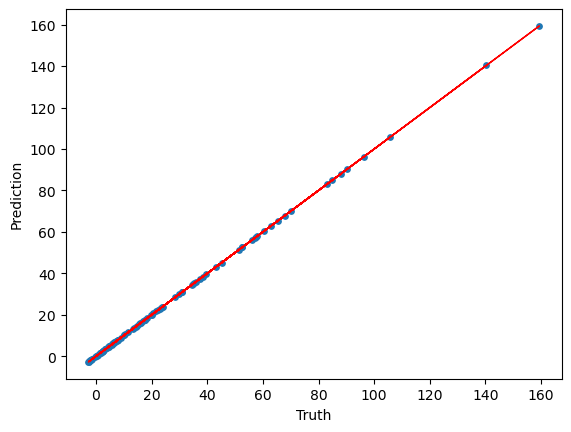

In [231]:
plt.scatter(y, p[6],s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## 2. Gaussian